# Import Packages

In [1]:
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import signal
from sklearn.linear_model import LinearRegression

import sys
from ANALYSIS.modules.segment import *
from ANALYSIS.modules.rotate import *
from ANALYSIS.modules.custom_graph import *

In [2]:
data = pd.read_csv("DATA/Segmented_Data/segmented_run.csv")
print(data.columns)
segmented_run_X = data['Run 3: Time (s)']
segmented_run_Y = data['Run 3: Volume (L)']

Index(['Unnamed: 0', 'Run 1: Time (s)', 'Run 1: Flow Rate (L/s)',
       'Run 1: Volume (L)', 'Run 2: Time (s)', 'Run 2: Flow Rate (L/s)',
       'Run 2: Volume (L)', 'Run 3: Time (s)', 'Run 3: Flow Rate (L/s)',
       'Run 3: Volume (L)'],
      dtype='object')


In [3]:
segmented_run = pd.DataFrame({"x":segmented_run_X, "y":segmented_run_Y})

In [6]:
segmented_run.x.values

array([1.6667000e-02, 3.3334000e-02, 5.0001000e-02, ..., 1.9950399e+01,
       1.9967066e+01, 1.9983733e+01])

/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_93013/4032236864.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_x = peak_x.append(pd.Series(segmented_run.x.iat[-1]))
/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_93013/4032236864.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_y = peak_y.append(pd.Series(segmented_run.y.iat[-1]))


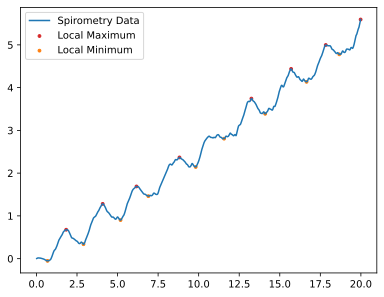

In [19]:
# find peaks
peak_indexes = signal.argrelextrema(segmented_run.y.values, np.greater, order=42)
peak_indexes = peak_indexes[0]

peak_x = segmented_run.x[peak_indexes]
peak_x = peak_x.append(pd.Series(segmented_run.x.iat[-1]))
peak_x.drop(index=peak_x.index[0], axis=0, inplace=True)
peak_y = segmented_run.y[peak_indexes]
peak_y = peak_y.append(pd.Series(segmented_run.y.iat[-1]))
peak_y.drop(index=peak_y.index[0], axis=0, inplace=True)


# find valleys
valley_indexes = signal.argrelextrema(segmented_run.y.values, np.less, order=27)
valley_indexes = valley_indexes[0]

valley_x = segmented_run.x[valley_indexes]
valley_y = segmented_run.y[valley_indexes]


plt.plot(segmented_run.x, segmented_run.y, label="Spirometry Data")
plt.scatter(peak_x, peak_y, s=8, label="Local Maximum", color="C3")
plt.scatter(valley_x, valley_y, s=8, label="Local Minimum", color="C1")
plt.legend()

In [20]:
type(peak_y)

pandas.core.series.Series

In [22]:
peak = pd.DataFrame({"x": peak_x, "y": peak_y})

In [31]:
reg = LinearRegression().fit(peak.x.to_numpy().reshape(-1,1), peak.y.to_numpy().reshape(-1,1))

In [34]:
predicted_peak_y = reg.predict(peak.x.to_numpy().reshape(-1,1))

In [35]:
peak.joinpredicted_peak_y

array([[0.59431141],
       [1.21173677],
       [1.78342692],
       [2.51061679],
       [3.72717342],
       [4.39948104],
       [4.98489175],
       [5.57487598]])

In [36]:
predicted_peak_y = np.insert(predicted_peak_y, 0, reg.predict([[0]]))
peak_x = np.insert(peak_x, 0, np.array([[0]]))

ValueError: Length of values (9) does not match length of index (8)